### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [3]:
import tensorflow as tf
tf.set_random_seed(42)

AttributeError: ignored

In [4]:
tf.__version__

'2.2.0'

### Collect Data

In [5]:
import keras

Using TensorFlow backend.


In [6]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
print(testX[0:5])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


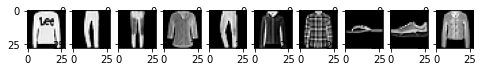

In [9]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 1
for i in range(1, columns*rows +1):
    img = testX[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    print(testY[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [9]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,batch_size = trainX.shape[0])

Epoch 1/50
1/1 [==============================] - 0s 222ms/step - loss: 187.1154 - accuracy: 0.1647 - val_loss: 6227.0454 - val_accuracy: 0.1273
Epoch 2/50
1/1 [==============================] - 0s 88ms/step - loss: 6244.2217 - accuracy: 0.1265 - val_loss: 12485.8340 - val_accuracy: 0.3503
Epoch 3/50
1/1 [==============================] - 0s 64ms/step - loss: 12435.3516 - accuracy: 0.3548 - val_loss: 15950.3389 - val_accuracy: 0.1873
Epoch 4/50
1/1 [==============================] - 0s 81ms/step - loss: 15859.9023 - accuracy: 0.1910 - val_loss: 18875.6797 - val_accuracy: 0.2223
Epoch 5/50
1/1 [==============================] - 0s 90ms/step - loss: 18776.9766 - accuracy: 0.2216 - val_loss: 14434.6045 - val_accuracy: 0.2837
Epoch 6/50
1/1 [==============================] - 0s 69ms/step - loss: 14353.6289 - accuracy: 0.2864 - val_loss: 14019.6699 - val_accuracy: 0.3115
Epoch 7/50
1/1 [==============================] - 0s 67ms/step - loss: 13949.3789 - accuracy: 0.3116 - val_loss: 7908.709

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [12]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,batch_size = trainX.shape[0])

Epoch 1/50
1/1 [==============================] - 0s 181ms/step - loss: 3.1157 - accuracy: 0.0990 - val_loss: 28.8096 - val_accuracy: 0.1528
Epoch 2/50
1/1 [==============================] - 0s 71ms/step - loss: 2.7880 - accuracy: 0.1361 - val_loss: 17.4057 - val_accuracy: 0.1776
Epoch 3/50
1/1 [==============================] - 0s 73ms/step - loss: 2.5205 - accuracy: 0.1894 - val_loss: 12.2768 - val_accuracy: 0.2046
Epoch 4/50
1/1 [==============================] - 0s 72ms/step - loss: 2.3020 - accuracy: 0.2452 - val_loss: 9.3644 - val_accuracy: 0.2331
Epoch 5/50
1/1 [==============================] - 0s 74ms/step - loss: 2.1227 - accuracy: 0.2982 - val_loss: 7.5293 - val_accuracy: 0.2613
Epoch 6/50
1/1 [==============================] - 0s 72ms/step - loss: 1.9741 - accuracy: 0.3444 - val_loss: 6.2810 - val_accuracy: 0.2837
Epoch 7/50
1/1 [==============================] - 0s 79ms/step - loss: 1.8497 - accuracy: 0.3843 - val_loss: 5.3809 - val_accuracy: 0.3022
Epoch 8/50
1/1 [=======

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=200,batch_size = trainX.shape[0])

Epoch 1/200
1/1 [==============================] - 0s 163ms/step - loss: 2.6791 - accuracy: 0.1479 - val_loss: 22.3805 - val_accuracy: 0.1604
Epoch 2/200
1/1 [==============================] - 0s 72ms/step - loss: 2.6553 - accuracy: 0.1520 - val_loss: 15.7554 - val_accuracy: 0.1632
Epoch 3/200
1/1 [==============================] - 0s 85ms/step - loss: 2.6320 - accuracy: 0.1564 - val_loss: 12.7538 - val_accuracy: 0.1645
Epoch 4/200
1/1 [==============================] - 0s 72ms/step - loss: 2.6091 - accuracy: 0.1606 - val_loss: 10.9400 - val_accuracy: 0.1662
Epoch 5/200
1/1 [==============================] - 0s 76ms/step - loss: 2.5867 - accuracy: 0.1652 - val_loss: 9.6897 - val_accuracy: 0.1687
Epoch 6/200
1/1 [==============================] - 0s 78ms/step - loss: 2.5647 - accuracy: 0.1699 - val_loss: 8.7594 - val_accuracy: 0.1711
Epoch 7/200
1/1 [==============================] - 0s 77ms/step - loss: 2.5431 - accuracy: 0.1748 - val_loss: 8.0318 - val_accuracy: 0.1730
Epoch 8/200
1/1

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.03)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization_7 (Batch (None, 100)               400       
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

### Run the model

In [20]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=200,batch_size = trainX.shape[0])

Epoch 1/200
1/1 [==============================] - 0s 234ms/step - loss: 3.1429 - accuracy: 0.0792 - val_loss: 2.4536 - val_accuracy: 0.1000
Epoch 2/200
1/1 [==============================] - 0s 99ms/step - loss: 2.0978 - accuracy: 0.2867 - val_loss: 2.4227 - val_accuracy: 0.1000
Epoch 3/200
1/1 [==============================] - 0s 106ms/step - loss: 1.6508 - accuracy: 0.4344 - val_loss: 2.4019 - val_accuracy: 0.1001
Epoch 4/200
1/1 [==============================] - 0s 97ms/step - loss: 1.4113 - accuracy: 0.5266 - val_loss: 2.3870 - val_accuracy: 0.1002
Epoch 5/200
1/1 [==============================] - 0s 102ms/step - loss: 1.2669 - accuracy: 0.5814 - val_loss: 2.3746 - val_accuracy: 0.1010
Epoch 6/200
1/1 [==============================] - 0s 99ms/step - loss: 1.1714 - accuracy: 0.6165 - val_loss: 2.3637 - val_accuracy: 0.1017
Epoch 7/200
1/1 [==============================] - 0s 98ms/step - loss: 1.1032 - accuracy: 0.6407 - val_loss: 2.3535 - val_accuracy: 0.1022
Epoch 8/200
1/1 [